In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the consumer complaint dataset
df = pd.read_csv('/kaggle/input/complaints/complaints.csv')
print(df.head())

df.columns = df.columns.str.replace(' ', '_')
column_names = df.columns
print(column_names)


/tmp/ipykernel_147/3876308759.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/complaints/complaints.csv')


  Date received                                            Product  \
0    2023-08-24  Credit reporting, credit repair services, or o...   
1    2023-08-25  Credit reporting or other personal consumer re...   
2    2023-07-13                        Checking or savings account   
3    2023-08-25  Credit reporting or other personal consumer re...   
4    2023-09-13  Credit reporting or other personal consumer re...   

        Sub-product                                              Issue  \
0  Credit reporting  Problem with a credit reporting company's inve...   
1  Credit reporting                        Improper use of your report   
2  Checking account             Problem caused by your funds being low   
3  Credit reporting                        Improper use of your report   
4  Credit reporting  Problem with a company's investigation into an...   

                                           Sub-issue  \
0  Was not notified of investigation status or re...   
1      Reporting compa

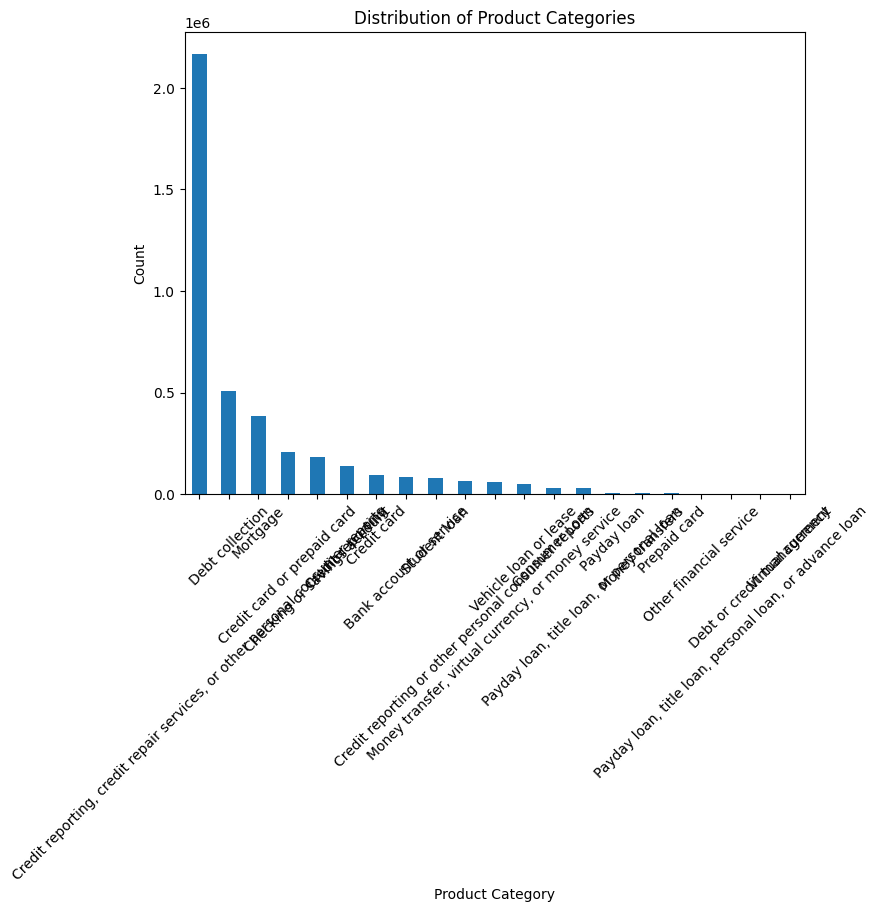

In [2]:
# Explore the distribution of product categories
product_category_counts = df['Product'].value_counts()
plt.figure(figsize=(8, 6))
product_category_counts.plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


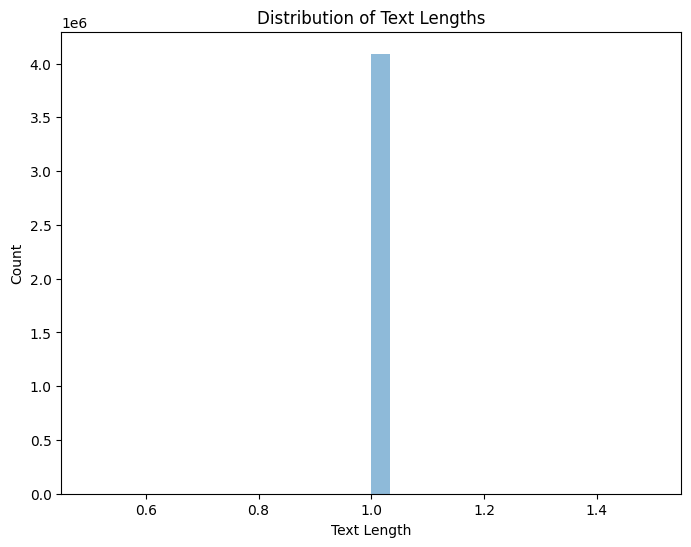

In [5]:
# Ensure the 'Consumer_complaint_narrative' column is recognized as string type
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].astype(str)

# Perform text pre-processing
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].str.lower()
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].str.replace('[^a-zA-Z\s]', '')

# Tokenization (split text into words)
df['Consumer_complaint_tokens'] = df['Consumer_complaint_narrative'].str.split()

# Explore the distribution of text lengths
df['Text_Length'] = df['Consumer_complaint_tokens'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(df['Text_Length'], bins=30, alpha=0.5)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [7]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

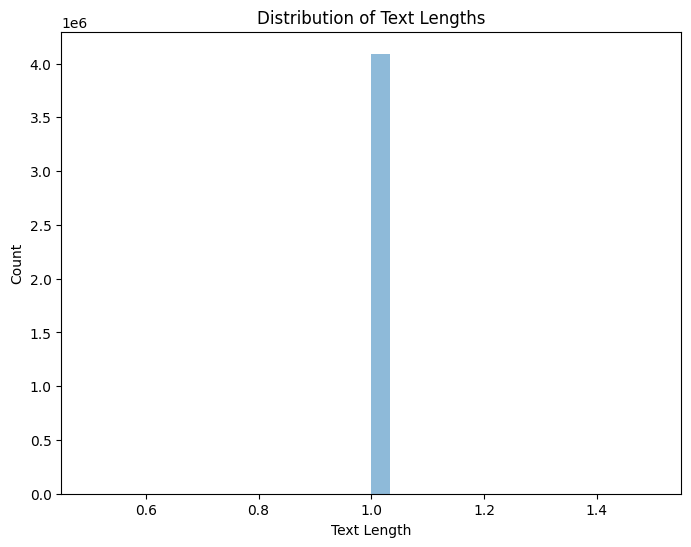

In [8]:
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].astype(str)

# Text Pre-processing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply text pre-processing to the 'Consumer_complaint_narrative' column
df['Consumer_complaint_narrative'] = df['Consumer_complaint_narrative'].apply(preprocess_text)

# Tokenization (split text into words)
df['Consumer_complaint_tokens'] = df['Consumer_complaint_narrative'].str.split()

# Explore the distribution of text lengths
df['Text_Length'] = df['Consumer_complaint_tokens'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(df['Text_Length'], bins=30, alpha=0.5)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X = df['Consumer_complaint_narrative']
y = df['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [11]:
# Model 1: Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

In [12]:
# Model 2: Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train_tfidf, y_train)
logreg_predictions = logreg_classifier.predict(X_test_tfidf)

In [ ]:
# Model 3: Support Vector Machines (SVM)
svm_classifier = SVC(kernel='linear', C=1, probability=True)
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)


In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

In [ ]:
# Evaluate the SVM model
evaluate_model(y_test, svm_predictions, "Support Vector Machines (SVM)")

In [ ]:
evaluate_model(y_test, nb_predictions, "Multinomial Naive Bayes")

In [ ]:
evaluate_model(y_test, logreg_predictions, "Logistic Regression")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Classification Report": report
    }

In [ ]:
# Model 1: Multinomial Naive Bayes
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_performance = evaluate_model(y_test, nb_predictions, "Multinomial Naive Bayes")


In [ ]:
# Model 2: Logistic Regression
logreg_predictions = logreg_classifier.predict(X_test_tfidf)
logreg_performance = evaluate_model(y_test, logreg_predictions, "Logistic Regression")


In [ ]:
# Model 3: Support Vector Machines (SVM)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_performance = evaluate_model(y_test, svm_predictions, "Support Vector Machines (SVM)")


In [ ]:
# Compare performance
performance_metrics = [nb_performance, logreg_performance, svm_performance]

for performance in performance_metrics:
    print(f"Model: {performance['Model']}")
    print(f"Accuracy: {performance['Accuracy']:.2f}")
    print("Classification Report:\n", performance['Classification Report'])
    print("\n")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Function to evaluate and print model performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)

# Evaluate Multinomial Naive Bayes
nb_predictions = nb_classifier.predict(X_test_tfidf)
evaluate_model(y_test, nb_predictions, "Multinomial Naive Bayes")

# Evaluate Logistic Regression
logreg_predictions = logreg_classifier.predict(X_test_tfidf)
evaluate_model(y_test, logreg_predictions, "Logistic Regression")

# Evaluate Support Vector Machines (SVM)
svm_predictions = svm_classifier.predict(X_test_tfidf)
evaluate_model(y_test, svm_predictions, "Support Vector Machines (SVM)")


In [ ]:
# Example text to predict
text_to_predict = ""

# Preprocess the text (same preprocessing steps as during training)
text_to_predict = preprocess_text(text_to_predict)

# Vectorize the preprocessed text using the same TF-IDF vectorizer
text_to_predict_tfidf = tfidf_vectorizer.transform([text_to_predict])

# Make predictions using the selected model
predicted_category = model.predict(text_to_predict_tfidf)

# Decode the predicted category into a human-readable label (e.g., 'Credit reporting, repair, or other')
predicted_category_label = label_encoder.inverse_transform(predicted_category)

# Print the predicted category
print(f"Predicted Category: {predicted_category_label[0]}")
